# **회귀 트리 적용**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#boston 데이터 로딩
bostonDF = pd.read_csv('/content/drive/MyDrive/독학/Python ML/data/boston-housing.csv')
bostonDF.rename(columns={'MEDV':'PRICE'}, inplace=True)
bostonDF = bostonDF.iloc[:, 1:]
print('Boston 데이터 크기:', bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE', axis=1, inplace=False)

#랜덤 포레스트 회귀 트리
rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 교차 검증의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 교차 검증의 평균 RMSE:', np.round(avg_rmse, 3))

Boston 데이터 크기: (506, 14)
5 교차 검증의 개별 Negative MSE scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores: [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE: 4.423


In [ ]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('#####', model.__class__.__name__, '#####')
    print('5 교차 검증의 평균 RMSE:', np.round(avg_rmse, 3))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]

for model in models:
    get_model_cv_prediction(model, X_data, y_target)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

<Axes: xlabel='None', ylabel='None'>

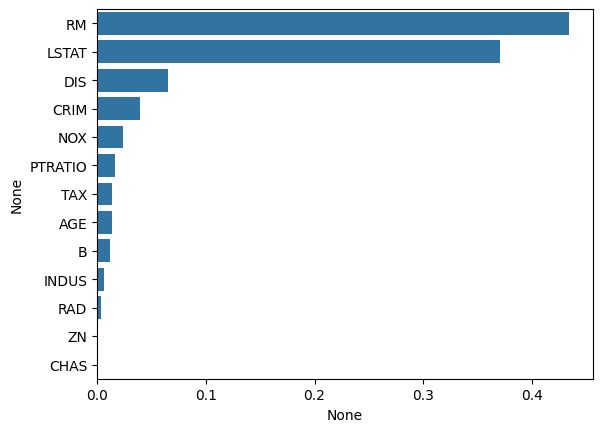

In [ ]:
import seaborn as sns

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series.sort_values(ascending=False, inplace=True)
sns.barplot(x=feature_series, y=feature_series.index)

# **회귀 트리 원리 시각화**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#boston 데이터 로딩
bostonDF = pd.read_csv('/content/drive/MyDrive/독학/Python ML/data/boston-housing.csv')
bostonDF.rename(columns={'MEDV':'PRICE'}, inplace=True)
bostonDF = bostonDF.iloc[:, 1:]

(100, 2)


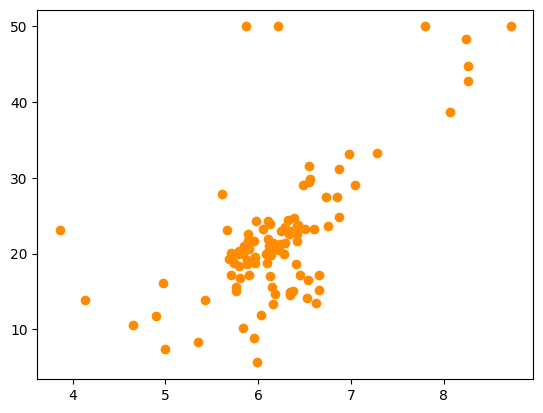

In [ ]:
bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)

plt.figure()
plt.scatter(bostonDF_sample['RM'], bostonDF_sample['PRICE'], c='darkorange')

In [ ]:
from sklearn.linear_model import LinearRegression

#선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

#실제 예측을 적용할 테스트 데이터 세트 생성
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

#학습 및 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

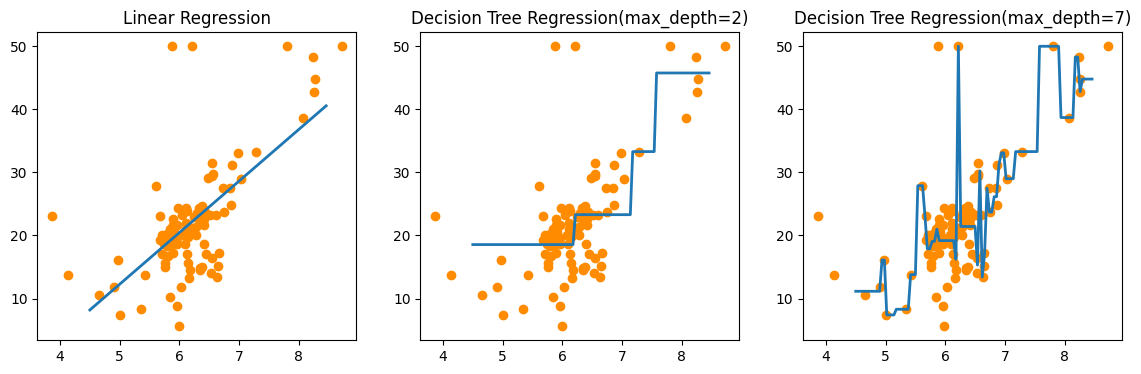

In [ ]:
#예측한 회귀선 시각화
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

#선형 회귀 모델 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample['RM'], bostonDF_sample['PRICE'], c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

#결정 트리 모델(max_depth=2) 회귀 예측선
ax2.set_title('Decision Tree Regression(max_depth=2)')
ax2.scatter(bostonDF_sample['RM'], bostonDF_sample['PRICE'], c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth:2', linewidth=2)

#결정 트리 모델(max_depth=7) 회귀 예측선
ax3.set_title('Decision Tree Regression(max_depth=7)')
ax3.scatter(bostonDF_sample['RM'], bostonDF_sample['PRICE'], c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth:7', linewidth=2)